In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


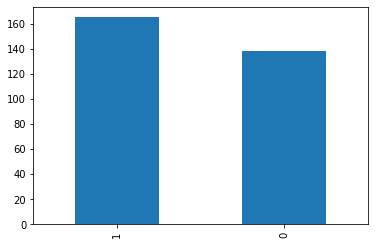

In [4]:
df.target.value_counts().plot(kind='bar')
plt.show()

In [5]:
X= df.iloc[:,:-1]   #[: ,0:-1]
y = df['target']
print(X.shape,y.shape)

(303, 13) (303,)


In [6]:
featselector=SelectKBest(chi2,k=2)
featselector.fit(X,y)
print(featselector.scores_)
print(featselector.get_feature_names_out())

[ 23.28662399   7.57683451  62.59809791  14.8239245   23.93639448
   0.20293368   2.97827075 188.32047169  38.91437697  72.64425301
   9.8040952   66.44076512   5.79185297]
['thalach' 'oldpeak']


In [7]:
features = X[featselector.get_feature_names_out()]
features.head()
scaler = StandardScaler()
scaledX= scaler.fit_transform(features)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,random_state=1)

In [9]:
xtrain.shape

(242, 2)

In [10]:
clf=GaussianNB()
clf.fit(xtrain,ytrain)

GaussianNB()

In [11]:
ypred = clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))

[[ 62  46]
 [ 19 115]]
              precision    recall  f1-score   support

           0       0.77      0.57      0.66       108
           1       0.71      0.86      0.78       134

    accuracy                           0.73       242
   macro avg       0.74      0.72      0.72       242
weighted avg       0.74      0.73      0.72       242



decompostion example

In [12]:
from sklearn.decomposition  import PCA

In [13]:
pca=PCA(n_components=3)
decomposed_X=pca.fit_transform(X)

In [14]:
import plotly.express as px

In [15]:
px.scatter_3d(x=decomposed_X[:,0],y=decomposed_X[:,1],z=decomposed_X[:,2],color=y.values)

implemation the SVC model on this data

In [16]:
from utils import plot_area_distribution

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


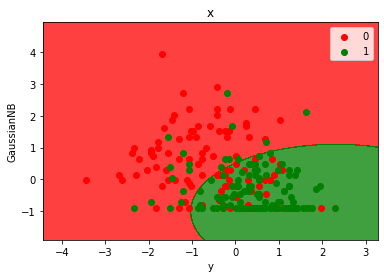

In [18]:
plot_area_distribution(clf,xtrain,ytrain,'x','y','GaussianNB')